**FLow:**
    * Ada boost 
        * With default
        * Hypertuned
    * GBM
        * Defualt values
        * Hypertuned with randomized search
    * Xgbm
        * With default values
        * Hypertuned with randomized search
    * stacking with the three models

## Building an AdaBoost Model

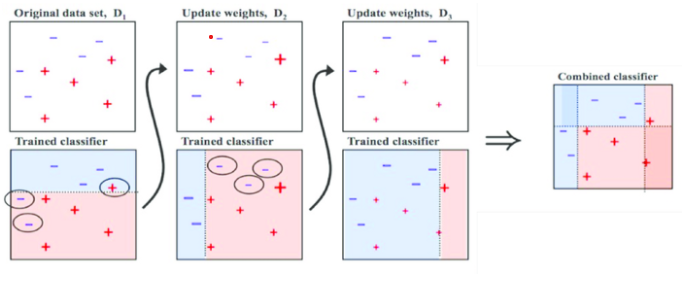

- With default values

In [55]:
#Importing AdaBoost Classifier 
from sklearn.ensemble import AdaBoostClassifier

In [56]:
#creating an AdaBoost instance
clf = AdaBoostClassifier(random_state=96)

In [57]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=96)

In [17]:
from sklearn.metrics import f1_score

In [59]:
train_predict = clf.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = clf.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.469376979936642, 0.45575757575757575)

- **With pruned decision tree as base_estimator**

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DTC = DecisionTreeClassifier(random_state = 11 , max_depth = 1 , max_features = "auto"  , class_weight = "balanced")

In [62]:
ABC = AdaBoostClassifier(base_estimator = DTC , random_state = 96)

In [63]:
#training the model
ABC.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                  

In [64]:
train_predict = ABC.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = ABC.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5381031613976706, 0.5265306122448979)

- Manually changing ADAboost parameters to see changes

In [65]:
ABC = AdaBoostClassifier(base_estimator = DTC , learning_rate = 0.001 ,  random_state = 96)

In [82]:
#training the model
ABC.fit(train_x,train_y)

train_predict = ABC.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = ABC.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5169646114556731, 0.5095753538717736)

In [83]:
ABC = AdaBoostClassifier(base_estimator = DTC , learning_rate = 0.0001 ,  random_state = 96)

#training the model
ABC.fit(train_x,train_y)

train_predict = ABC.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = ABC.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5171941986682478, 0.5095753538717736)

- Learning and estimators changes

In [86]:
ABC = AdaBoostClassifier(base_estimator = DTC , learning_rate = 0.0001 , n_estimators =  1000,  random_state = 96)

#training the model
ABC.fit(train_x,train_y)

train_predict = ABC.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = ABC.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5160627568173328, 0.5055007052186177)

In [87]:
ABC = AdaBoostClassifier(base_estimator = DTC , learning_rate = 0.0001 , n_estimators =  100,  random_state = 96)

#training the model
ABC.fit(train_x,train_y)

train_predict = ABC.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = ABC.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.516002977298102, 0.5066066910317683)

- Changing base_estimator as logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression 

LR = LogisticRegression(penalty='l1' , class_weight='balanced', solver='liblinear')

In [91]:
ABC = AdaBoostClassifier(base_estimator = LR , learning_rate = 0.01 , n_estimators =  100,  random_state = 96)

#training the model
ABC.fit(train_x,train_y)

train_predict = ABC.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = ABC.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.49643366619115553, 0.4942493005906123)

# Hyperparameter Tuning

1. **base_estimator:** The model to ensemble. Default is decision tree.
2. **n_estimators:** Total number of models to build.
3. **learning_rate:** Shrinks the contribution of each classifier by this value.
4. **random_state:** The random number seed so that same random numbers are generated every time.

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
base_estimator = [DTC]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 10)]
learning_rate = [0.00001 , 0.0001 , 0.001 , 0.05 ,  0.01 , 0.1 , 1.0]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'base_estimator' : base_estimator,
              'learning_rate' : learning_rate,
              }
pprint(random_grid)

{'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')],
 'learning_rate': [1e-05, 0.0001, 0.001, 0.05, 0.01, 0.1, 1.0],
 'n_estimators': [100, 255, 411, 566, 722, 877, 1033, 1188, 1344, 1500]}


* **Applying Randomized search to parameters**

In [67]:
from sklearn.model_selection import StratifiedKFold

In [68]:
ABC = AdaBoostClassifier(random_state=11)
abc_random = RandomizedSearchCV(estimator = ABC, param_distributions = random_grid, n_iter = 30, cv = StratifiedKFold(n_splits=3), verbose=3, random_state=11, n_jobs = 3)
# Fit the random search model
abc_random.fit(train_x, train_y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  5.1min
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed: 20.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=11),
                   iid='deprecated', n_iter=30, n_jobs=3,
                   param_distributions={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                  class_weight='balanc...
                                                                                  min_impurity_split=None,
                                                                                  min_samples_leaf=1,
                                                                         

* **Best parameters from randomized search on adaboost parameters**

In [69]:
abc_random.best_estimator_, abc_random.best_score_

(AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight='balanced',
                                                          criterion='gini',
                                                          max_depth=1,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
     

- **Dataframe of All the parameter combination and respective test mean and std_dev**

In [72]:
pd.DataFrame(abc_random.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,param_base_estimator,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
13,62.167411,0.203578,8.577091,0.033871,1500,0.001,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 1500, 'learning_rate': 0.001,...",0.766800,0.772000,0.769867,0.769556,0.002134,1
1,65.768964,0.265159,9.538536,0.040973,1500,0.0001,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 1500, 'learning_rate': 0.0001...",0.766533,0.772133,0.767600,0.768756,0.002428,2
18,42.739534,0.118739,5.868640,0.082013,1033,0.001,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 1033, 'learning_rate': 0.001,...",0.766533,0.771600,0.768000,0.768711,0.002129,3
22,55.410944,0.164467,7.684936,0.092153,1344,0.0001,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 1344, 'learning_rate': 0.0001...",0.766400,0.771867,0.767600,0.768622,0.002346,4
11,61.743320,0.270526,8.602743,0.026269,1500,1e-05,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 1500, 'learning_rate': 1e-05,...",0.766400,0.772133,0.767200,0.768578,0.002535,5
28,55.785061,0.128851,7.566005,0.029081,1344,1e-05,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 1344, 'learning_rate': 1e-05,...",0.766400,0.771733,0.767067,0.768400,0.002373,6
23,4.308861,0.135047,0.544686,0.004964,100,0.01,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 100, 'learning_rate': 0.01, '...",0.766133,0.771333,0.767733,0.768400,0.002175,6
12,17.189825,0.077336,2.275699,0.038819,411,0.001,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 411, 'learning_rate': 0.001, ...",0.766000,0.771467,0.767600,0.768356,0.002295,8
27,42.615935,0.133690,5.770364,0.077889,1033,0.0001,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 1033, 'learning_rate': 0.0001...",0.766267,0.771467,0.767067,0.768267,0.002286,9
14,17.132192,0.056134,2.276363,0.033351,411,1e-05,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'n_estimators': 411, 'learning_rate': 1e-05, ...",0.766133,0.771467,0.767067,0.768222,0.002326,10


- **Applying best parameters**

In [71]:
ABC = AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight='balanced',
                                                          criterion='gini',
                                                          max_depth=1,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
                                                          random_state=11,
                                                          splitter='best'),
                    learning_rate=0.001, n_estimators=1500, random_state=11)
#training the model
ABC.fit(train_x,train_y)

train_predict = ABC.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = ABC.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5157384987893464, 0.5078651685393258)

- Result:
    
    **No major change even aftetr tuning**

# Gradient Boosting

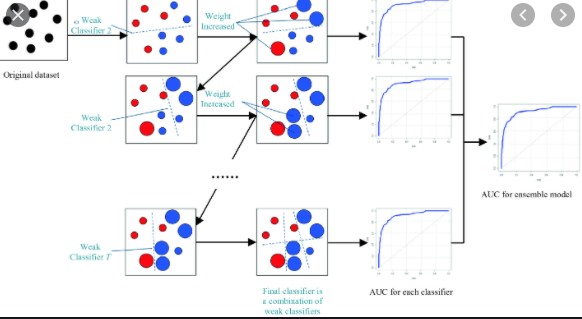

- Applying with default values of gradient boosting

In [75]:
#Importing GBDT Classifier 
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
#creating an Gradient boosting instance
clf = GradientBoostingClassifier(random_state=96)

In [77]:
#training the model
clf.fit(train_x,train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=96, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
train_predict = clf.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = clf.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5047090697974455, 0.4734758511480601)

### GBDT Hyperparameters

##### Model Based Hyperparameters

1. **n_estimators:** Total number of trees.
2. **loss:** The loss function to be minimized. 
3. **subsample:**The fraction of observations to be selected for each tree. Selection is done by random sampling.
4. **random_state:** The random number seed so that same random numbers are generated every time.
5. **learning_rate:** This determines the impact of each tree on the final outcome 

### Tree Based Hyperparameters

1. **max_depth:** Maximum depth to which tree can grow (stopping criteria)
2. **max_features:** The number of features to consider while searching for a best split
3. **max_leaf_nodes:** The maximum number of terminal nodes or leaves in a tree
4. **min_samples_leaf:** Minimum samples required in a terminal node or leaf (stopping criteria)
5. **min_samples_split:** Minimum number of samples required in a node for splitting (stopping criteria)

* **initializing values for randomized search**

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 10)]
learning_rate = [0.0001 , 0.001 ,  0.01 , 0.1 , 0.05 , 0.2 , 0.7 , 1.0]
subsample = [0.6 , 0.65 , 0.7 , 0.75 , 0.8 , 0.85 , 0.9 , 0.95]
criterion = ['friedman_mse', 'mse']
max_features = ['auto' , 'log2']
warm_start = ['True' , 'False']
loss = ['deviance' , 'exponential']
min_samples_split = [0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07]
min_samples_leaf = [0.005 , 0.01 , 0.015 , 0.02 , 0.025 , 0.03 , 0.035 , 0.04 , 0.05]
max_depth = [3 , 4 , 5, 6, 7, 8, 9 , 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'learning_rate' : learning_rate,
              'subsample' : subsample,
               'criterion' :criterion,
               'max_features' :max_features,
               'warm_start' : warm_start,
                
               'loss' : loss ,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_depth' : max_depth         
              }
pprint(random_grid)

{'criterion': ['friedman_mse', 'mse'],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.05, 0.2, 0.7, 1.0],
 'loss': ['deviance', 'exponential'],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.05],
 'min_samples_split': [0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
 'n_estimators': [100, 255, 411, 566, 722, 877, 1033, 1188, 1344, 1500],
 'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
 'warm_start': ['True', 'False']}


* **Randomized search**

In [121]:
GBC = GradientBoostingClassifier(random_state=11)
gbc_random = RandomizedSearchCV(estimator = GBC, param_distributions = random_grid, n_iter = 30, cv = StratifiedKFold(n_splits=3), verbose=3, random_state=11, n_jobs = 3)
# Fit the random search model
gbc_random.fit(train_x, train_y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 11.7min
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed: 77.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                  

* Best Parameters

In [122]:
gbc_random.best_estimator_, gbc_random.best_score_

(GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                            learning_rate=0.01, loss='exponential', max_depth=5,
                            max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=0.01, min_samples_split=0.06,
                            min_weight_fraction_leaf=0.0, n_estimators=1188,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=11, subsample=0.75, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start='False'),
 0.8200444444444445)

* Dataframe of all combinations of randomized search sorted by test_mean_score

In [127]:
x = pd.DataFrame(gbc_random.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

In [132]:
x

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_subsample,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,...,param_loss,param_learning_rate,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
27,340.342669,1.834183,0.545242,0.144356,False,0.75,1188,0.06,0.01,auto,...,exponential,0.01,mse,"{'warm_start': 'False', 'subsample': 0.75, 'n_...",0.821733,0.816800,0.821600,0.820044,0.002295,1
10,3.441268,0.293974,0.053023,0.011523,True,0.65,100,0.03,0.01,log2,...,exponential,0.2,mse,"{'warm_start': 'True', 'subsample': 0.65, 'n_e...",0.823067,0.816533,0.820267,0.819956,0.002676,2
1,12.564477,0.019195,0.187005,0.005863,False,0.85,255,0.02,0.005,log2,...,deviance,0.01,mse,"{'warm_start': 'False', 'subsample': 0.85, 'n_...",0.822267,0.816667,0.820267,0.819733,0.002317,3
4,2.559737,0.031426,0.041339,0.000628,False,0.9,100,0.02,0.02,log2,...,deviance,0.2,friedman_mse,"{'warm_start': 'False', 'subsample': 0.9, 'n_e...",0.821733,0.815867,0.820667,0.819422,0.002552,4
12,13.269766,0.148055,0.188342,0.002034,False,0.7,411,0.02,0.03,log2,...,exponential,0.1,friedman_mse,"{'warm_start': 'False', 'subsample': 0.7, 'n_e...",0.822267,0.814267,0.819333,0.818622,0.003304,5


* **Applying best parameters**

In [124]:
gbm = GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                            learning_rate=0.01, loss='exponential', max_depth=5,
                            max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=0.01, min_samples_split=0.06,
                            min_weight_fraction_leaf=0.0, n_estimators=1188,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=11, subsample=0.75, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start='False')

In [125]:
gbm.fit(train_x , train_y)
train_predict = gbm.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = gbm.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.5047090697974455, 0.4740799366838148)

* **Result :** 
    
    * Not Good results 
    * Ada Boost results were better

# XGBOOST

* Applying with default values

In [21]:
#Importing XGBM Classifier 
from xgboost import XGBClassifier

In [24]:
#creating an extreme Gradient boosting instance
clf = XGBClassifier(random_state=96)

In [138]:
#training the model
clf.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=96, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
train_predict = clf.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = clf.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.7425636124716282, 0.46805234795996925)

# Hyperparamter Tuning

1. **n_estimators:** Total number of trees
2. **learning_rate:**This determines the impact of each tree on the final outcome
3. **random_state:** The random number seed so that same random numbers are generated every time
4. **max_depth:** Maximum depth to which tree can grow (stopping criteria)
5. **subsample:** The fraction of observations to be selected for each tree. Selection is done by random sampling
6. **objective:** Defines Loss function (*binary:logistic* is for classification using probability, *reg:logistic* is for classification, *reg:linear* is for regression)
7. **colsample_bylevel:** Random feature selection at levels
8. **colsample_bytree:** Random feature selection at tree

**Initializing list for randomized search**

In [27]:
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 700, stop = 3000, num = 10)]
objective = ["binary:logistic" , "reg:logistic"]
learning_rate = [0.01 , 0.05 , 0.1 , 0.15 , 0.2 , 0.25 ,0.3, 0.35 ]
subsample = [0.5 , 0.55 , 0.6 , 0.65 , 0.7 , 0.75 , 0.8 , 0.85 , 0.9 , 0.95]
max_depth = [3, 4, 5,6,7,8,9,10]
min_child_weight = [0.5 , 1 , 0.05 , 0.01 , 0.6 , 0.6 , 0.8 , 0.9]
gamma = [0.1 , 0.2 , 0.3 , 0.4 , 0.5] 
colsample_bytree = [0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 0.95]
scale_pos_weight = [1 , 2 , 3 , 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'learning_rate' : learning_rate,
              'subsample' : subsample,
               'objective':objective,
               'max_depth':max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'colsample_bytree':colsample_bytree,
               'scale_pos_weight':scale_pos_weight
              }
pprint(random_grid)

{'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95],
 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
 'min_child_weight': [0.5, 1, 0.05, 0.01, 0.6, 0.6, 0.8, 0.9],
 'n_estimators': [700, 955, 1211, 1466, 1722, 1977, 2233, 2488, 2744, 3000],
 'objective': ['binary:logistic', 'reg:logistic'],
 'scale_pos_weight': [1, 2, 3, 4],
 'subsample': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]}


In [35]:
clf = XGBClassifier(random_state=11)
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 30, cv = StratifiedKFold(n_splits=3), verbose=3, random_state=11, n_jobs = 3)
# Fit the random search model
clf_random.fit(train_x, train_y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 27.5min
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed: 110.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                        'min_child_weight': [0.5, 1, 0.05, 0.01,
                                                             0.6, 0.6, 0.8,
                                                             0.9],
                        

**Best Parameters from search**

In [36]:
clf_random.best_estimator_, clf_random.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.95, gamma=0.3, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.01, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=1466, n_jobs=0, num_parallel_tree=1,
               objective='binary:logistic', random_state=11, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=0.9,
               tree_method='exact', validate_parameters=1, verbosity=None),
 0.8212)

* **Values of randomized search in dataframe sorted by test_mean_score**

In [43]:
x = pd.DataFrame(clf_random.cv_results_).sort_values(by='mean_test_score', ascending=False)
x

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_objective,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,239.598591,0.997540,2.469181,0.056329,0.9,1,binary:logistic,1466,1,6,0.01,0.3,0.95,"{'subsample': 0.9, 'scale_pos_weight': 1, 'obj...",0.823467,0.817200,0.822933,0.821200,0.002837,1
24,122.188380,1.003616,2.133446,0.046200,0.85,1,binary:logistic,700,0.9,10,0.01,0.4,0.7,"{'subsample': 0.85, 'scale_pos_weight': 1, 'ob...",0.822800,0.817067,0.819600,0.819822,0.002346,2
8,155.862549,0.337735,2.203645,0.031707,0.9,2,binary:logistic,1722,0.5,5,0.01,0.2,0.6,"{'subsample': 0.9, 'scale_pos_weight': 2, 'obj...",0.814267,0.810533,0.810800,0.811867,0.001701,3
0,314.196621,0.264059,15.602272,0.109476,0.75,3,binary:logistic,2233,0.6,9,0.01,0.2,0.5,"{'subsample': 0.75, 'scale_pos_weight': 3, 'ob...",0.812800,0.805333,0.810933,0.809689,0.003173,4
17,341.546176,0.782474,2.834045,0.036949,0.95,3,binary:logistic,1722,1,9,0.1,0.2,0.95,"{'subsample': 0.95, 'scale_pos_weight': 3, 'ob...",0.808133,0.806000,0.804533,0.806222,0.001478,5
25,153.530437,0.151864,1.155673,0.039171,0.9,3,reg:logistic,955,0.05,10,0.25,0.1,0.6,"{'subsample': 0.9, 'scale_pos_weight': 3, 'obj...",0.808667,0.804800,0.803200,0.805556,0.002295,6
13,366.637144,3.067836,1.961544,0.024943,0.95,3,binary:logistic,2233,0.5,8,0.2,0.1,0.8,"{'subsample': 0.95, 'scale_pos_weight': 3, 'ob...",0.803200,0.803067,0.802133,0.802800,0.000475,7
29,91.744478,1.260950,0.575003,0.038849,0.85,2,binary:logistic,700,0.6,9,0.3,0.4,0.6,"{'subsample': 0.85, 'scale_pos_weight': 2, 'ob...",0.801600,0.801733,0.803333,0.802222,0.000788,8
22,53.595983,0.217031,0.867503,0.003740,0.85,4,binary:logistic,700,0.5,7,0.15,0.3,0.4,"{'subsample': 0.85, 'scale_pos_weight': 4, 'ob...",0.804800,0.797200,0.801733,0.801244,0.003122,9
14,165.249395,0.783812,5.277979,0.040769,0.6,4,binary:logistic,2233,0.6,7,0.05,0.5,0.4,"{'subsample': 0.6, 'scale_pos_weight': 4, 'obj...",0.802133,0.794133,0.800533,0.798933,0.003456,10


* **Applying best parameters**

In [41]:
#creating an extreme Gradient boosting instance
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.95, gamma=0.3, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.01, max_delta_step=0, max_depth=6,
               min_child_weight=1, monotone_constraints='()',
               n_estimators=1466, n_jobs=0, num_parallel_tree=1,
               objective='binary:logistic', random_state=11, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=0.9,
               tree_method='exact', validate_parameters=1, verbosity=None)

#training the model
clf.fit(train_x,train_y)

train_predict = clf.predict(train_x)
score1 = f1_score(train_predict, train_y)
test_predict = clf.predict(test_x)
score2 = f1_score(test_predict, test_y)
score1 , score2

(0.6274262667002773, 0.47058823529411764)

* **Result :**
    
    * Not good results

* **Summary of all three scores from different ensemble models**

* ADAboost (0.5161350320840695 , 0.5071528751753156)
* GBM  -  (0.5012866700977869 , 0.47607843137254896)
* Xgbm - (0.6274262667002773 , 0.47058823529411764)

**Result :**
    * Adaboost gave best results of all three ensemble model

* **Stacking the three applied model for better predictions**

In [46]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    train_pred=model.predict(train_x)
    test_pred = model.predict(test_x)
    #score on the training data
    train_score=f1_score(train_pred,train_y)
    print('Training Score:', train_score)
    test_score=f1_score(test_pred,test_y)
    print('Testing Score:', test_score)
    #storing predictions for train and test
    return train_pred, test_pred

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
# Base Model 1 - Adaboost
ADA = AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight='balanced',
                                                          criterion='gini',
                                                          max_depth=1,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
                                                          random_state=11,
                                                          splitter='best'),
                    learning_rate=0.0001, n_estimators=1500, random_state=11)
M1_train, M1_test = model_predictions(ADA, train_x, train_y, test_x)

Training Score: 0.5161350320840695
Testing Score: 0.5071528751753156


In [53]:
#Base Model 2 - GBM
GBM= GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                            learning_rate=0.01, loss='exponential', max_depth=5,
                            max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=0.01, min_samples_split=0.06,
                            min_weight_fraction_leaf=0.0, n_estimators=1188,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=11, subsample=0.75, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start='False')
M2_train, M2_test = model_predictions(GBM, train_x, train_y, test_x)

Training Score: 0.5012866700977869
Testing Score: 0.47607843137254896


In [54]:
# Base Model 3 - XGBM
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.95, gamma=0.3, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.01, max_delta_step=0, max_depth=6,
               min_child_weight=1, monotone_constraints='()',
               n_estimators=1466, n_jobs=0, num_parallel_tree=1,
               objective='binary:logistic', random_state=11, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=0.9,
               tree_method='exact', validate_parameters=1, verbosity=None)


M3_train, M3_test = model_predictions(clf, train_x, train_y, test_x)

Training Score: 0.6274262667002773
Testing Score: 0.47058823529411764


In [55]:
# New train dataframe (from base models)
train_prediction = {
              'ADA': M1_train,
              'GBM': M2_train,
              'clf': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,ADA,GBM,clf
0,0,0,1
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [56]:
train_predictions.tail()

,ADA,GBM,clf
22495,1,0,0
22496,0,0,0
22497,0,0,0
22498,0,0,0
22499,1,0,0


In [57]:
#New test dataframe (from base models)
test_prediction = {
              'ADA': M1_test,
              'GBM': M2_test,
              'clf': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,ADA,GBM,clf
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [58]:
test_predictions.tail()

,ADA,GBM,clf
7495,0,0,0
7496,0,0,0
7497,0,0,0
7498,1,1,1
7499,0,0,0


**Using New train and New test data to test**

In [59]:
# Stacker model_1 - Adaboost
model_1 = AdaBoostClassifier()
model_1.fit(train_predictions, train_y)
predict1 = model_1.predict(train_predictions)
predict2 = model_1.predict(test_predictions)
new_score_train = f1_score(predict1,train_y)
new_score_test = f1_score(predict2,test_y)
new_score_train , new_score_test

(0.6274262667002773, 0.47058823529411764)

In [60]:
# Stacker model_2 - xgbm
model_2 = XGBClassifier()
model_2.fit(train_predictions, train_y)
predict1 = model_2.predict(train_predictions)
predict2 = model_2.predict(test_predictions)
new_score_train = f1_score(predict1,train_y)
new_score_test = f1_score(predict2,test_y)
new_score_train , new_score_test

(0.6274262667002773, 0.47058823529411764)

In [63]:
# Stacker model_3 -- decision tree
model_1 = DecisionTreeClassifier()
model_1.fit(train_predictions, train_y)
predict1 = model_1.predict(train_predictions)
predict2 = model_1.predict(test_predictions)
new_score_train = f1_score(predict1,train_y)
new_score_test = f1_score(predict2,test_y)
new_score_train , new_score_test

(0.6274262667002773, 0.47058823529411764)

* **Result:**
    
    - Adaboost works best from ada , gbm and xgbm
    - in general , The stacker mmodel with decision tree , logisitc regression and knn worked best till this point